<a href="https://colab.research.google.com/github/MohammadJavadN/FarmFrenzy/blob/master/Question3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1 align="center">An Introduction to Machine Learning - 25737</h1>
<h4 align="center">Dr. Sajjad Amini</h4>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>

**Student Name**: MohammadJavad Noroozi

**Student ID**:99102434

# Classification

In this question, we will examine classification algorithms. We do not need to implement the algorithms; instead, we will use the functions available in the `scikit-learn` library to solve the question.

## Importing Libraries

First, we import all required libraries.

**Attention**: You should only use these libraries. Other libraries are not acceptable.

In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt

## Loading Data

In this question, we will use the **Breast Cancer** dataset from `scikit-learn`. You can run the following cell to load the dataset:

In [19]:
data = load_breast_cancer() # loading cancer data

X = data.data # features
Y = data.target # labels 

# printing size of the features and targets
print(X.shape)
print(Y.shape)

(569, 30)
(569,)


Now you should use `train_test_split` function to split dataset into three parts:

- 70% for the training set
- 20% for the validation set
- 10% for the test set

Do this in the cell below.

In [20]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = None, None, None, None, None, None

### START CODE HERE ###
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.22, random_state=42)

# Print the number of samples in each set
print(f"Number of samples in the training set: {len(X_train)}")
print(f"Number of samples in the validation set: {len(X_val)}")
print(f"Number of samples in the test set: {len(X_test)}")
### END CODE HERE ###

Number of samples in the training set: 399
Number of samples in the validation set: 113
Number of samples in the test set: 57


## Logistic Regression

In this part of the question, you will use the `LogisticRegression` classifier to classify the data. You should change the value of `C`, which is the inverse of the regularization parameter, and find the accuracy on the validation set. Using the validation accuracy, you can find the best value for `C`. Note that you may want to change the solver for faster convergence. The `liblinear` solver is recommended for this problem. You can visit [this link](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for more information about the `LogisticRegression` classifier.

**Question**: What is the best value of `C`?

**Answer**: C = 10

In [21]:
### START CODE HERE ###
# Define a list of values for C to test
C_values = [0.001, 0.01, 0.1, 1, 10, 100]

# Train and evaluate a LogisticRegression model with each value of C
best_C = None
best_accuracy = 0.0
for C in C_values:
    lr = LogisticRegression(solver='liblinear', C=C)
    lr.fit(X_train, Y_train)
    correct_count = 0
    total_count = len(Y_val)
    for i, x in enumerate(X_val):
        y_pred = lr.predict([x])[0]
        if y_pred == Y_val[i]:
            correct_count += 1
    accuracy = correct_count / total_count
    print("C = {}, Validation Accuracy = {:.3f}".format(C, accuracy))
    if accuracy > best_accuracy:
        best_C = C
        best_accuracy = accuracy

# Print the best value for C and its corresponding validation accuracy
print("Best value for C: ", best_C)
print("Validation accuracy: ", best_accuracy)
### END CODE HERE ###

C = 0.001, Validation Accuracy = 0.920
C = 0.01, Validation Accuracy = 0.929
C = 0.1, Validation Accuracy = 0.947
C = 1, Validation Accuracy = 0.947
C = 10, Validation Accuracy = 0.956
C = 100, Validation Accuracy = 0.956
Best value for C:  10
Validation accuracy:  0.9557522123893806


Now use your best classifier to calculate the accuracy on the test set.

**Qusetion**: What is the accuracy of this classifier on test set?

**Answer**: 0.9824561403508771

In [27]:
### START CODE HERE ###
# Create a LogisticRegression model with the best C value and liblinear solver
best_model = LogisticRegression(C=best_C, solver='liblinear')

# Train the best model on the entire dataset
best_model.fit(X_train, Y_train)

# Use the best model to predict the labels for the test set
y_test_pred = best_model.predict(X_test)

# Calculate the accuracy on the test set
correct_predictions = sum(Y_test == y_test_pred)
test_accuracy = correct_predictions / len(Y_test)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
### END CODE HERE ###

Test accuracy: 0.9824561403508771


For this additional part, you can use only the first two features of the dataset to classify the data and then draw the data points and the boundary on a figure. You can use the [tutorial](https://aleksandarhaber.com/solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial/?utm_source=rss&utm_medium=rss&utm_campaign=solve-classification-problems-in-python-scikit-learn-and-visualize-the-classification-results-machine-learning-tutorial) provided to learn how to do this. You may need to use additional libraries such as `matplotlib` specifically for this part.

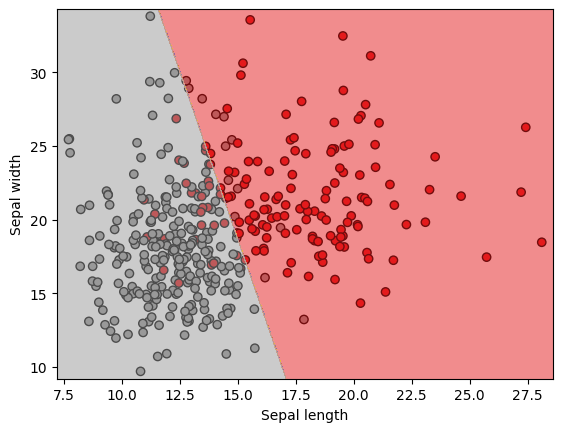

In [24]:
### START CODE HERE ###
# Select the first two features of the dataset
X_2d = X_train[:, :2]

# Create a LogisticRegression model with the best C value and liblinear solver
best_model_2d = LogisticRegression(C=best_C, solver='liblinear')

# Train the best model on the first two features of the dataset
best_model_2d.fit(X_2d, Y_train)

# Plot the data points and the decision boundary
plt.scatter(X_2d[:, 0], X_2d[:, 1], c=Y_train, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

# Create a meshgrid to plot the decision boundary
h = 0.02  # step size in the mesh
x_min, x_max = X_2d[:, 0].min() - 0.5, X_2d[:, 0].max() + 0.5
y_min, y_max = X_2d[:, 1].min() - 0.5, X_2d[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Use the best model to predict the labels for the meshgrid
Z = best_model_2d.predict(np.c_[xx.ravel(), yy.ravel()])

# Plot the decision boundary
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Set1, alpha=0.5)

# Show the plot
plt.show()
### END CODE HERE ###

## Naive Bayes

In this part, you will use the `GaussianNB` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.9824561403508771

In [25]:
### START CODE HERE ###
# Create a GaussianNB classifier
gnb = GaussianNB()

# Train the classifier on the training set
gnb.fit(X_train, Y_train)

# Use the trained classifier to predict the labels for the test set
y_test_pred = gnb.predict(X_test)

# Calculate the accuracy on the test set
correct_predictions = sum(Y_test == y_test_pred)
test_accuracy = correct_predictions / len(Y_test)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
### END CODE HERE ###

Test accuracy: 0.9824561403508771


## LDA (Linear Discriminant Analysis)

In this part, you will use the `LinearDiscriminantAnalysis` classifier to classify the data. You should not change the default parameters of this classifier. First, train the classifier on the training set and then find the accuracy of it on the test set.

**Question**: What is the accuracy of this method on test set?

**Answer**: 0.9649122807017544

In [26]:
### START CODE HERE ###
# Create a LinearDiscriminantAnalysis classifier
lda = LinearDiscriminantAnalysis()

# Train the classifier on the training set
lda.fit(X_train, Y_train)

# Use the trained classifier to predict the labels for the test set
y_test_pred = lda.predict(X_test)

# Calculate the accuracy on the test set
correct_predictions = sum(Y_test == y_test_pred)
test_accuracy = correct_predictions / len(Y_test)

# Print the test accuracy
print(f"Test accuracy: {test_accuracy}")
### END CODE HERE ###

Test accuracy: 0.9649122807017544


## Conclution

**Question**: What is the best method for classifying this dataset? What is the best accuracy on the test set?

**Answer**: Both "Logistic Regression" and "Naive Bayes" have the same precision. But "Naive Bayes" is done in one step. So it seems that "Naive Bayes" is better.